In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
import numpy as np
import random
import os, subprocess

## Perceptron Algorithm

In [2]:
class Perceptron:    
    def fit(self, X, y, n_iter=100):
        
        n_samples = X.shape[0]
        n_features = X.shape[1]
        # Add 1 for the bias term
        self.weights = np.zeros((n_features+1,))
        
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        
        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                    self.weights += y[j]*X[j, :]
                    
    def predict(self, X):
        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return
        
        n_samples = X.shape[0]
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)
        
        return y
    
    def score(self, X, y):
        pred_y = self.predict(X)
        
        return np.mean(y == pred_y)

## Linearly Separable Data

#### Linearly Separable Data Generation

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1,random_state=100)
y = np.where(y==1,y,-1)

#### Fitting data with Perceptron algorithm

In [4]:
p = Perceptron()
p.fit(X,y)
print("Accuracy: ",p.score(X,y))

Accuracy:  1.0


#### Visualization

Text(0.5, 1.0, 'Perceptron for linearly separable data')

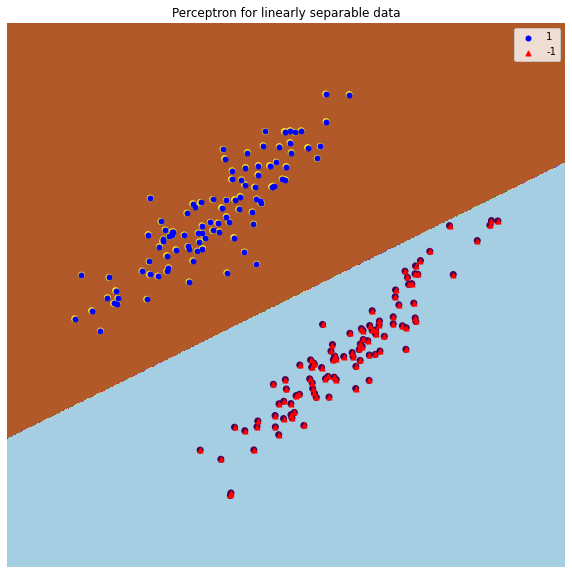

In [5]:
h = .01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots(figsize=(10,10))
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y)

ax.scatter(X[y == 1, 0],
            X[y == 1, 1],
            c='b', marker='o',
            label='1',s=25)
ax.scatter(X[y == -1, 0],
            X[y == -1, 1],
            c='r',
            marker='^',
            label='-1',s=25)
ax.legend()
ax.set_title('Perceptron for linearly separable data')

## Linearly Non-Separable Data

#### Linearly Non-Separable Data Generation

In [6]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

#### Fitting data with Perceptron algorithm

In [7]:
p2 = Perceptron()
p2.fit(X_xor,y_xor)
print("Accuracy: ",p2.score(X_xor,y_xor))

Accuracy:  0.495


For non-linear dataset, convergence is not successfull as in the linear dataset. Perceptron would not be good for linearly non-separable dataset. But the thing about a perceptron is that it’s decision boundary is linear in terms of the weights, not necessarily in terms of inputs. If we add polynomial features to the input, we can get higher accuracy values.

#### Visualization

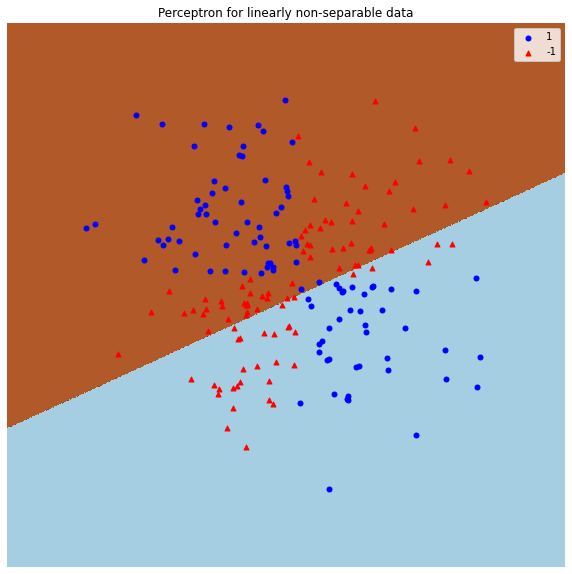

In [8]:
h = .01
x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots(figsize=(10,10))
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
# ax.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor)

ax.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='o',
            label='1',s=25)
ax.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='^',
            label='-1',s=25)
ax.set_title('Perceptron for linearly non-separable data')
ax.legend(loc='best')

## Increase the radii of the data

### For linearly separable Data

#### Linearly Separable Data Generation

In [9]:
X, y = make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1,random_state=100)
X=5*X
y = np.where(y==1,y,-1)

#### Fitting data with Perceptron algorithm

In [10]:
p = Perceptron()
p.fit(X,y)
print("Accuracy: ",p.score(X,y))

Accuracy:  1.0


Text(0.5, 1.0, 'Perceptron for linearly separable data')

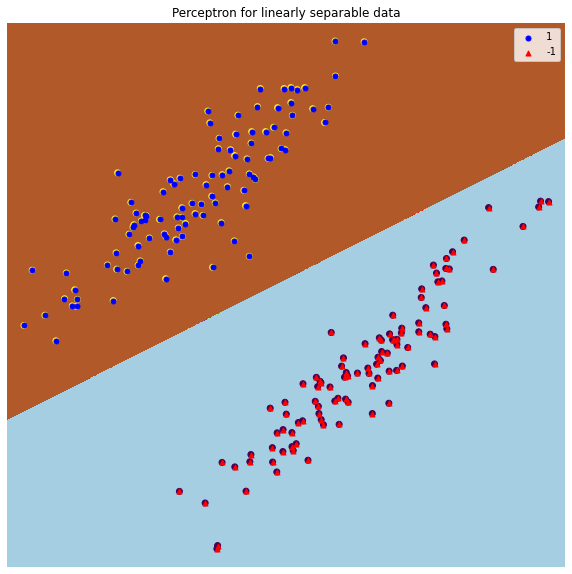

In [11]:
h = .01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots(figsize=(10,10))
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y)

ax.scatter(X[y == 1, 0],
            X[y == 1, 1],
            c='b', marker='o',
            label='1',s=25)
ax.scatter(X[y == -1, 0],
            X[y == -1, 1],
            c='r',
            marker='^',
            label='-1',s=25)
ax.legend()
ax.set_title('Perceptron for linearly separable data')

### For linearly non-separable data
#### Linearly Non-Separable Data Generation

In [12]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
X_xor = 5*X_xor
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

#### Fitting data with Perceptron algorithm

In [13]:
p2 = Perceptron()
p2.fit(X_xor,y_xor)
print("Accuracy: ",p2.score(X_xor,y_xor))

Accuracy:  0.51


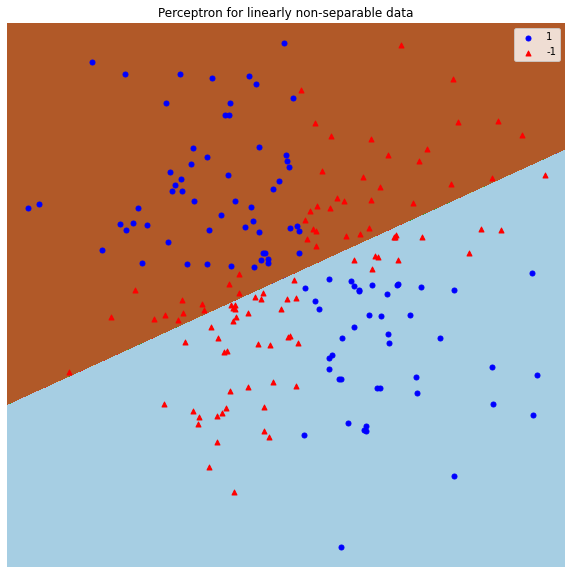

In [14]:
h = .01
x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots(figsize=(10,10))
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
# ax.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor)

ax.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='o',
            label='1',s=25)
ax.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='^',
            label='-1',s=25)
ax.set_title('Perceptron for linearly non-separable data')
ax.legend(loc='best')

Increasing the radii of the data does not affect the performance of the algorithm.